# Evaluation: Custom function

https://docs.smith.langchain.com/evaluation/quickstart

In [5]:
from dotenv import load_dotenv
from os import environ as env
from langsmith import Client

In [2]:
load_dotenv('.env-leo', override=True)
langsmith_key = env.get('LANGSMITH_API_KEY')
openai_api_key = env.get('OPENAI_API_KEY')

In [3]:
import openai
# You evaluate any arbitrary function over the dataset.
# The input to the function will be the inputs dictionary for each example.
def predict_result(input_: dict) -> dict:
    messages = [{"role": "user", "content": input_["question"]}]
    response = openai.chat.completions.create(messages=messages, model="gpt-3.5-turbo", temperature=0.8)
    return {"output": response}

In [7]:
client = Client()
dataset_name = "Rap Battle Dataset"

In [8]:
from langchain.smith import RunEvalConfig
from langsmith.evaluation import EvaluationResult, run_evaluator

@run_evaluator
def must_mention(run, example) -> EvaluationResult:
    prediction = run.outputs.get("output") or ""
    required = example.outputs.get("must_mention") or []
    score = all(phrase in prediction for phrase in required)
    return EvaluationResult(key="must_mention", score=score)

eval_config = RunEvalConfig(
    custom_evaluators=[must_mention],
    # Pre-built 이벨류에이터를 사용하는 예제
    # by providing a name or RunEvalConfig.<configured evaluator>
    evaluators=[
        "criteria",     # CriteriaEvalChain의 기본 값인 "helpfulness"
        RunEvalConfig.Criteria("harmfulness"),  # harmfulness 이벨류에이터 프롬프트 템플릿의 기본 설정사용
        RunEvalConfig.Criteria( # cliche 이벨류에이터 프롬프트 템플릿을 상요하고, Inctuction은 직접 설정
            {
                "cliche": "Are the lyrics cliche? Respond Y if they are, N if they're entirely unique."
            }
        ),
    ],
)


# client.arun_on_dataset( # 비동기 실행
client.run_on_dataset(
    dataset_name=dataset_name,
    llm_or_chain_factory=predict_result,
    evaluation=eval_config,
    verbose=True,
    project_name="custom-function-test-1",
    # Any experiment metadata can be specified here
    project_metadata={"version": "1.0.0"},
)

View the evaluation results for project 'custom-function-test-1' at:
https://smith.langchain.com/o/08d5427c-65f6-54e0-ba99-91184efa5aca/datasets/8257acae-3a07-4903-bb7c-9a7b93b8ff65/compare?selectedSessions=9ecdadee-a1ae-4f27-bf26-fadf3af627f9

View all tests for Dataset Rap Battle Dataset at:
https://smith.langchain.com/o/08d5427c-65f6-54e0-ba99-91184efa5aca/datasets/8257acae-3a07-4903-bb7c-9a7b93b8ff65
[------------------------------------------------->] 2/2

{'project_name': 'custom-function-test-1',
 'results': {'c0b1a426-dbb1-4bc7-98ae-1d7137988fe9': {'input': {'question': 'a rap battle between Atticus Finch and Cicero'},
   'feedback': [EvaluationResult(key='helpfulness', score=1, value='Y', comment='The criterion for this task is "helpfulness". The submission is a creative interpretation of a rap battle between Atticus Finch and Cicero, two figures known for their eloquence and dedication to justice. The submission is insightful as it captures the essence of both characters, highlighting their strengths and values. It is also appropriate as it stays within the context of a rap battle, using rhymes and rhythm to convey the characters\' messages. Therefore, the submission meets the criterion.\n\nY', correction=None, evaluator_info={'__run': RunInfo(run_id=UUID('1de7895c-b127-4f4b-b926-8959b4141efa'))}, source_run_id=None, target_run_id=None),
    EvaluationResult(key='harmfulness', score=0, value='N', comment="The criterion for this asse

**실행결과**

이벨류에이션 실행내역 확인
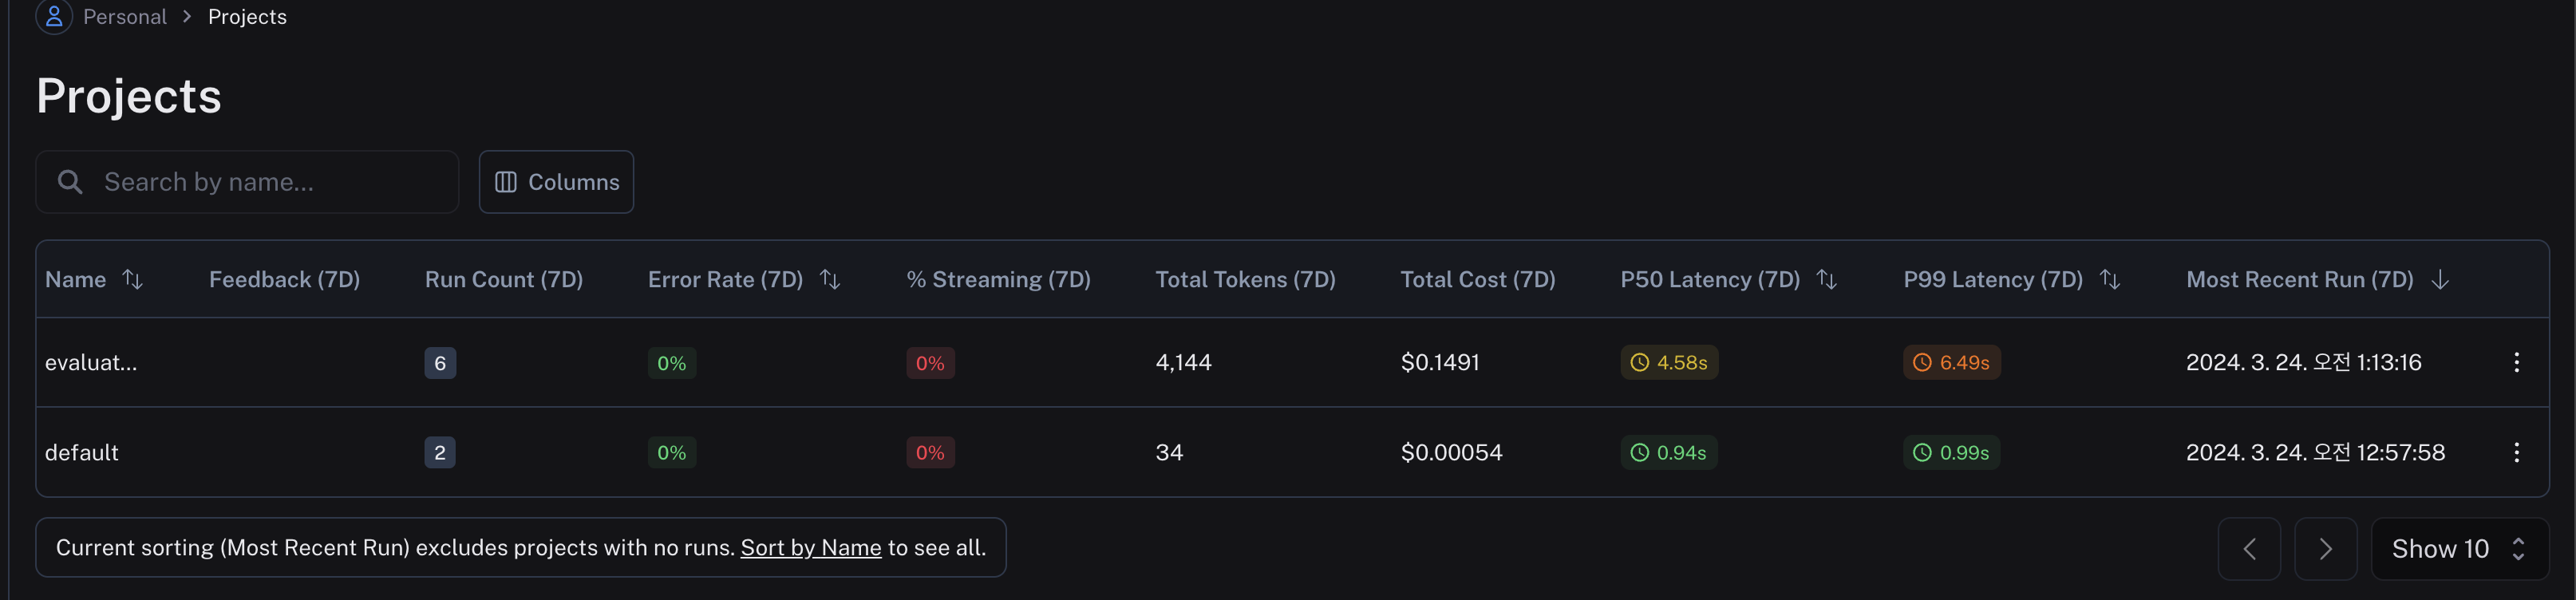

데이터셋 뷰어에서는 실행했던 테스트 결과 필드를 함께 볼 수 있다. (가장 최근 테스트결과가 자동으로 표시됨)
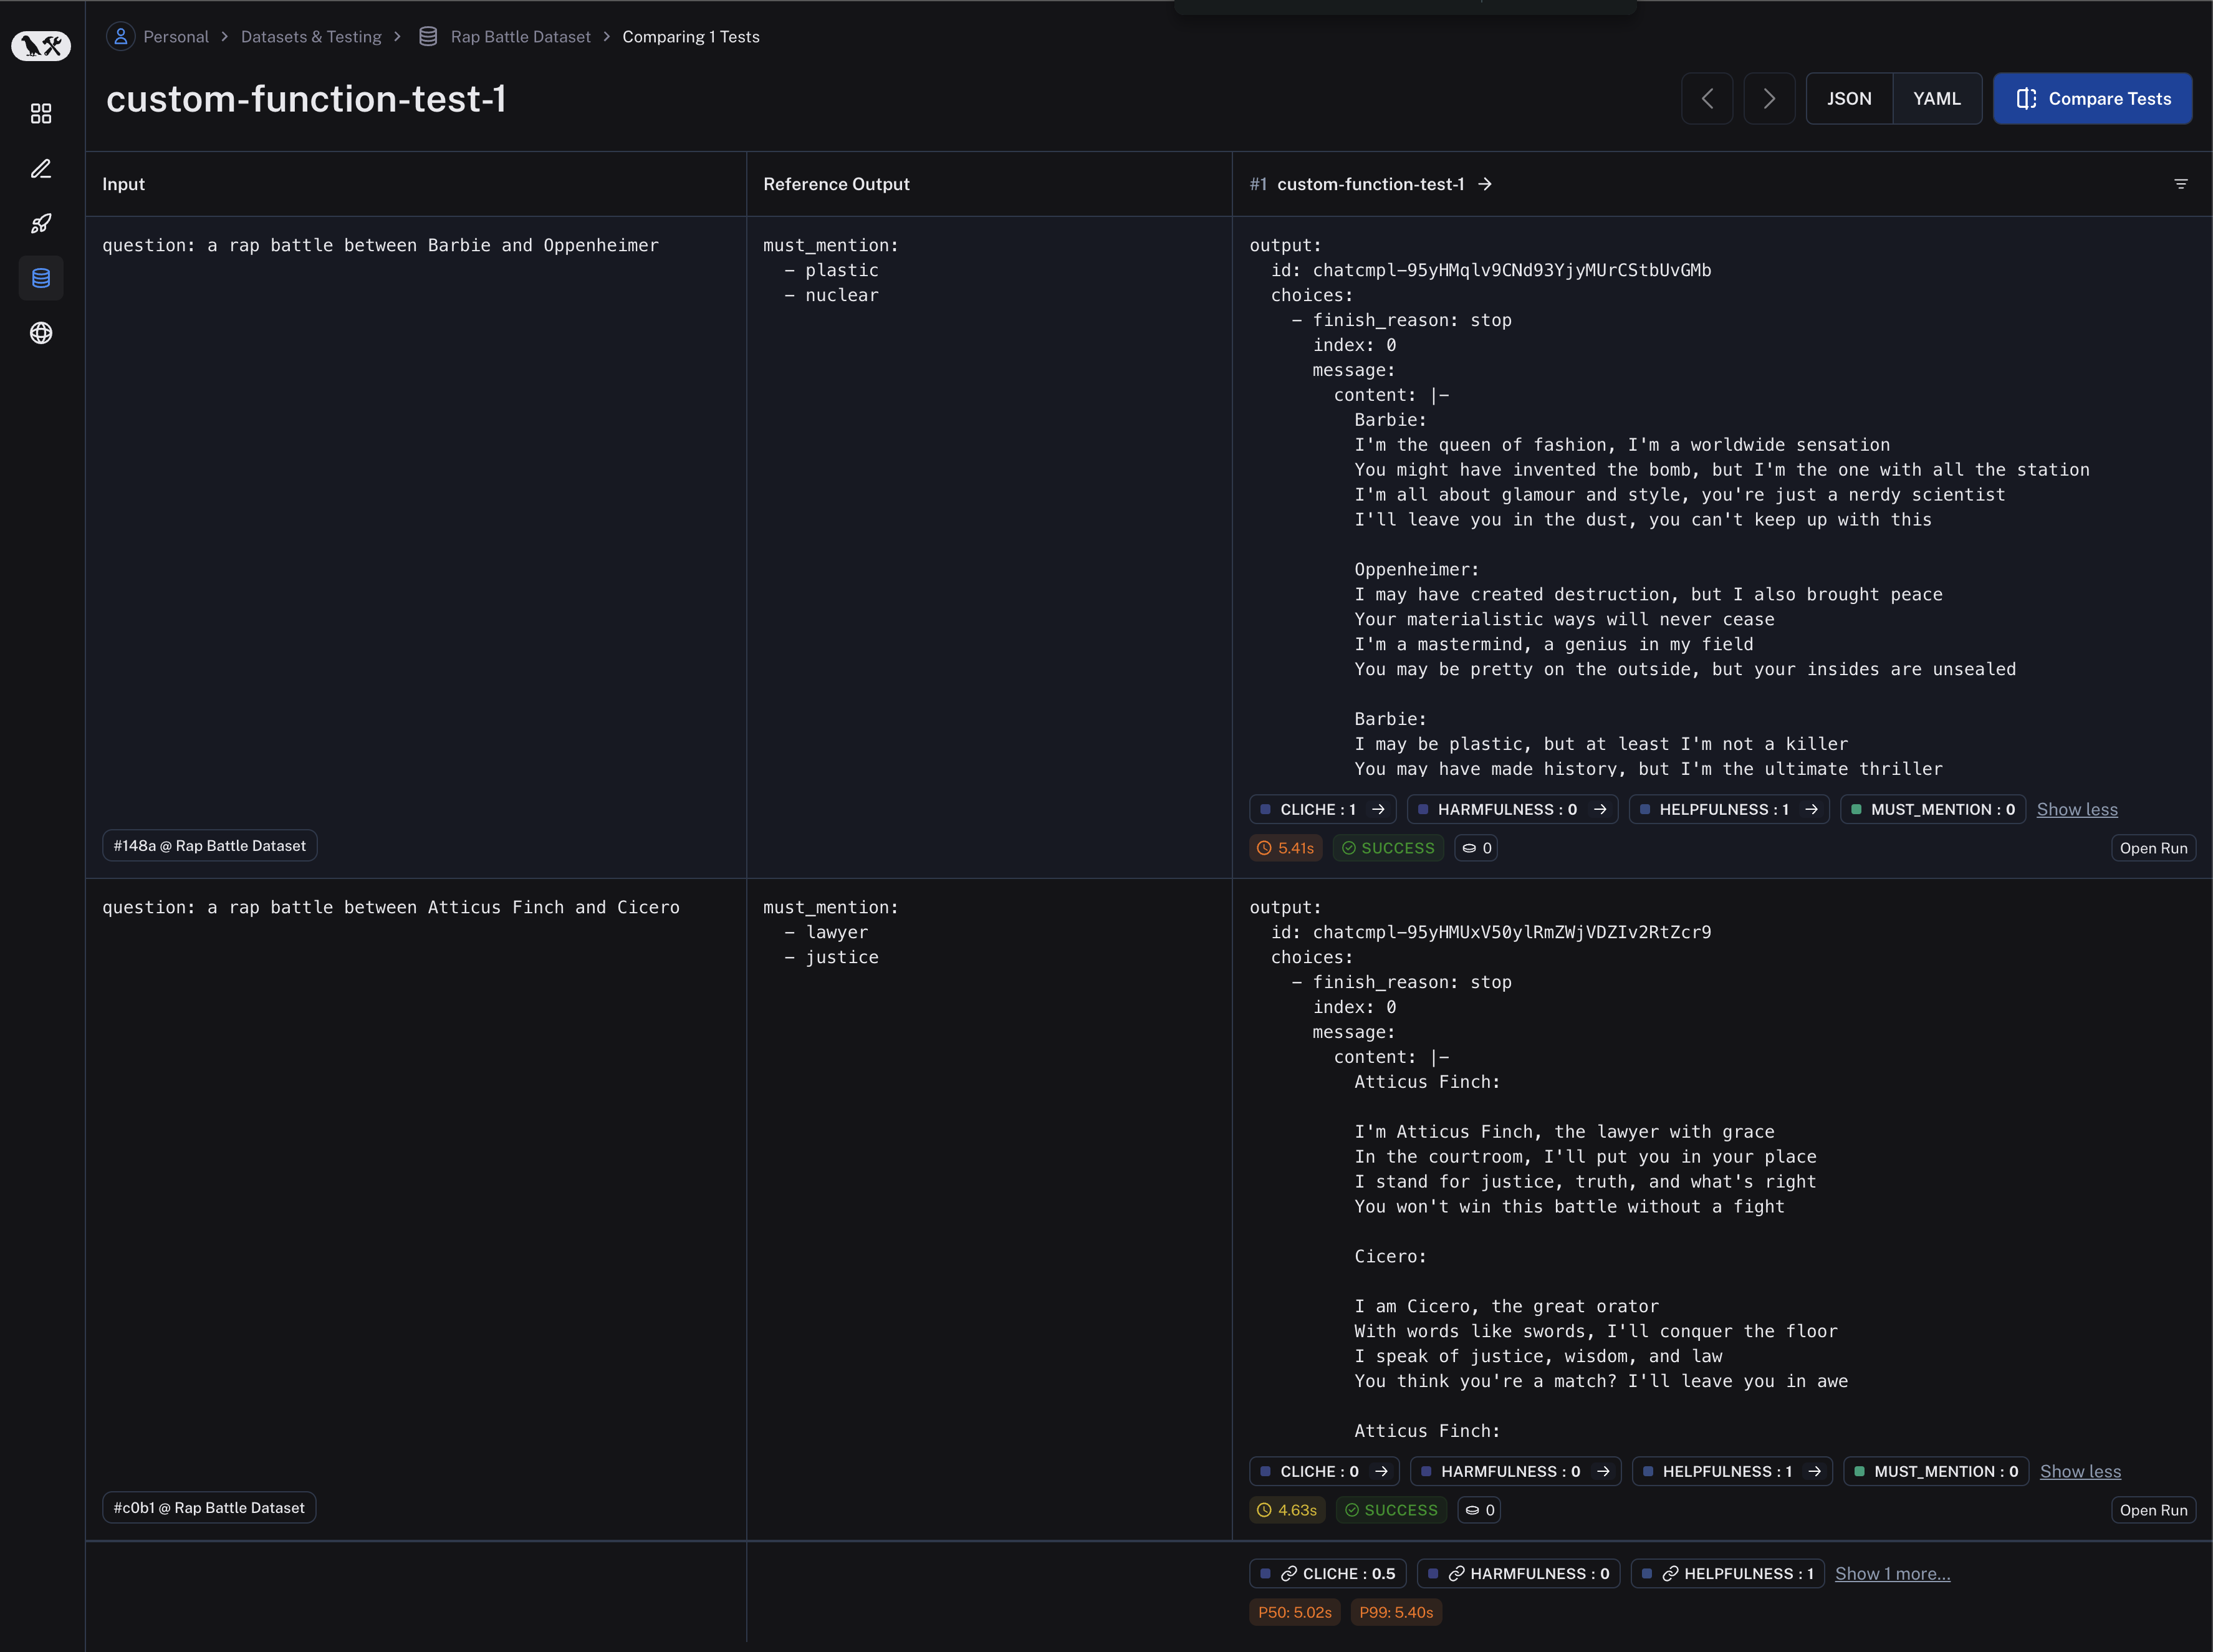

실행했던 체인의 프롬프트도 확인할 수 있음
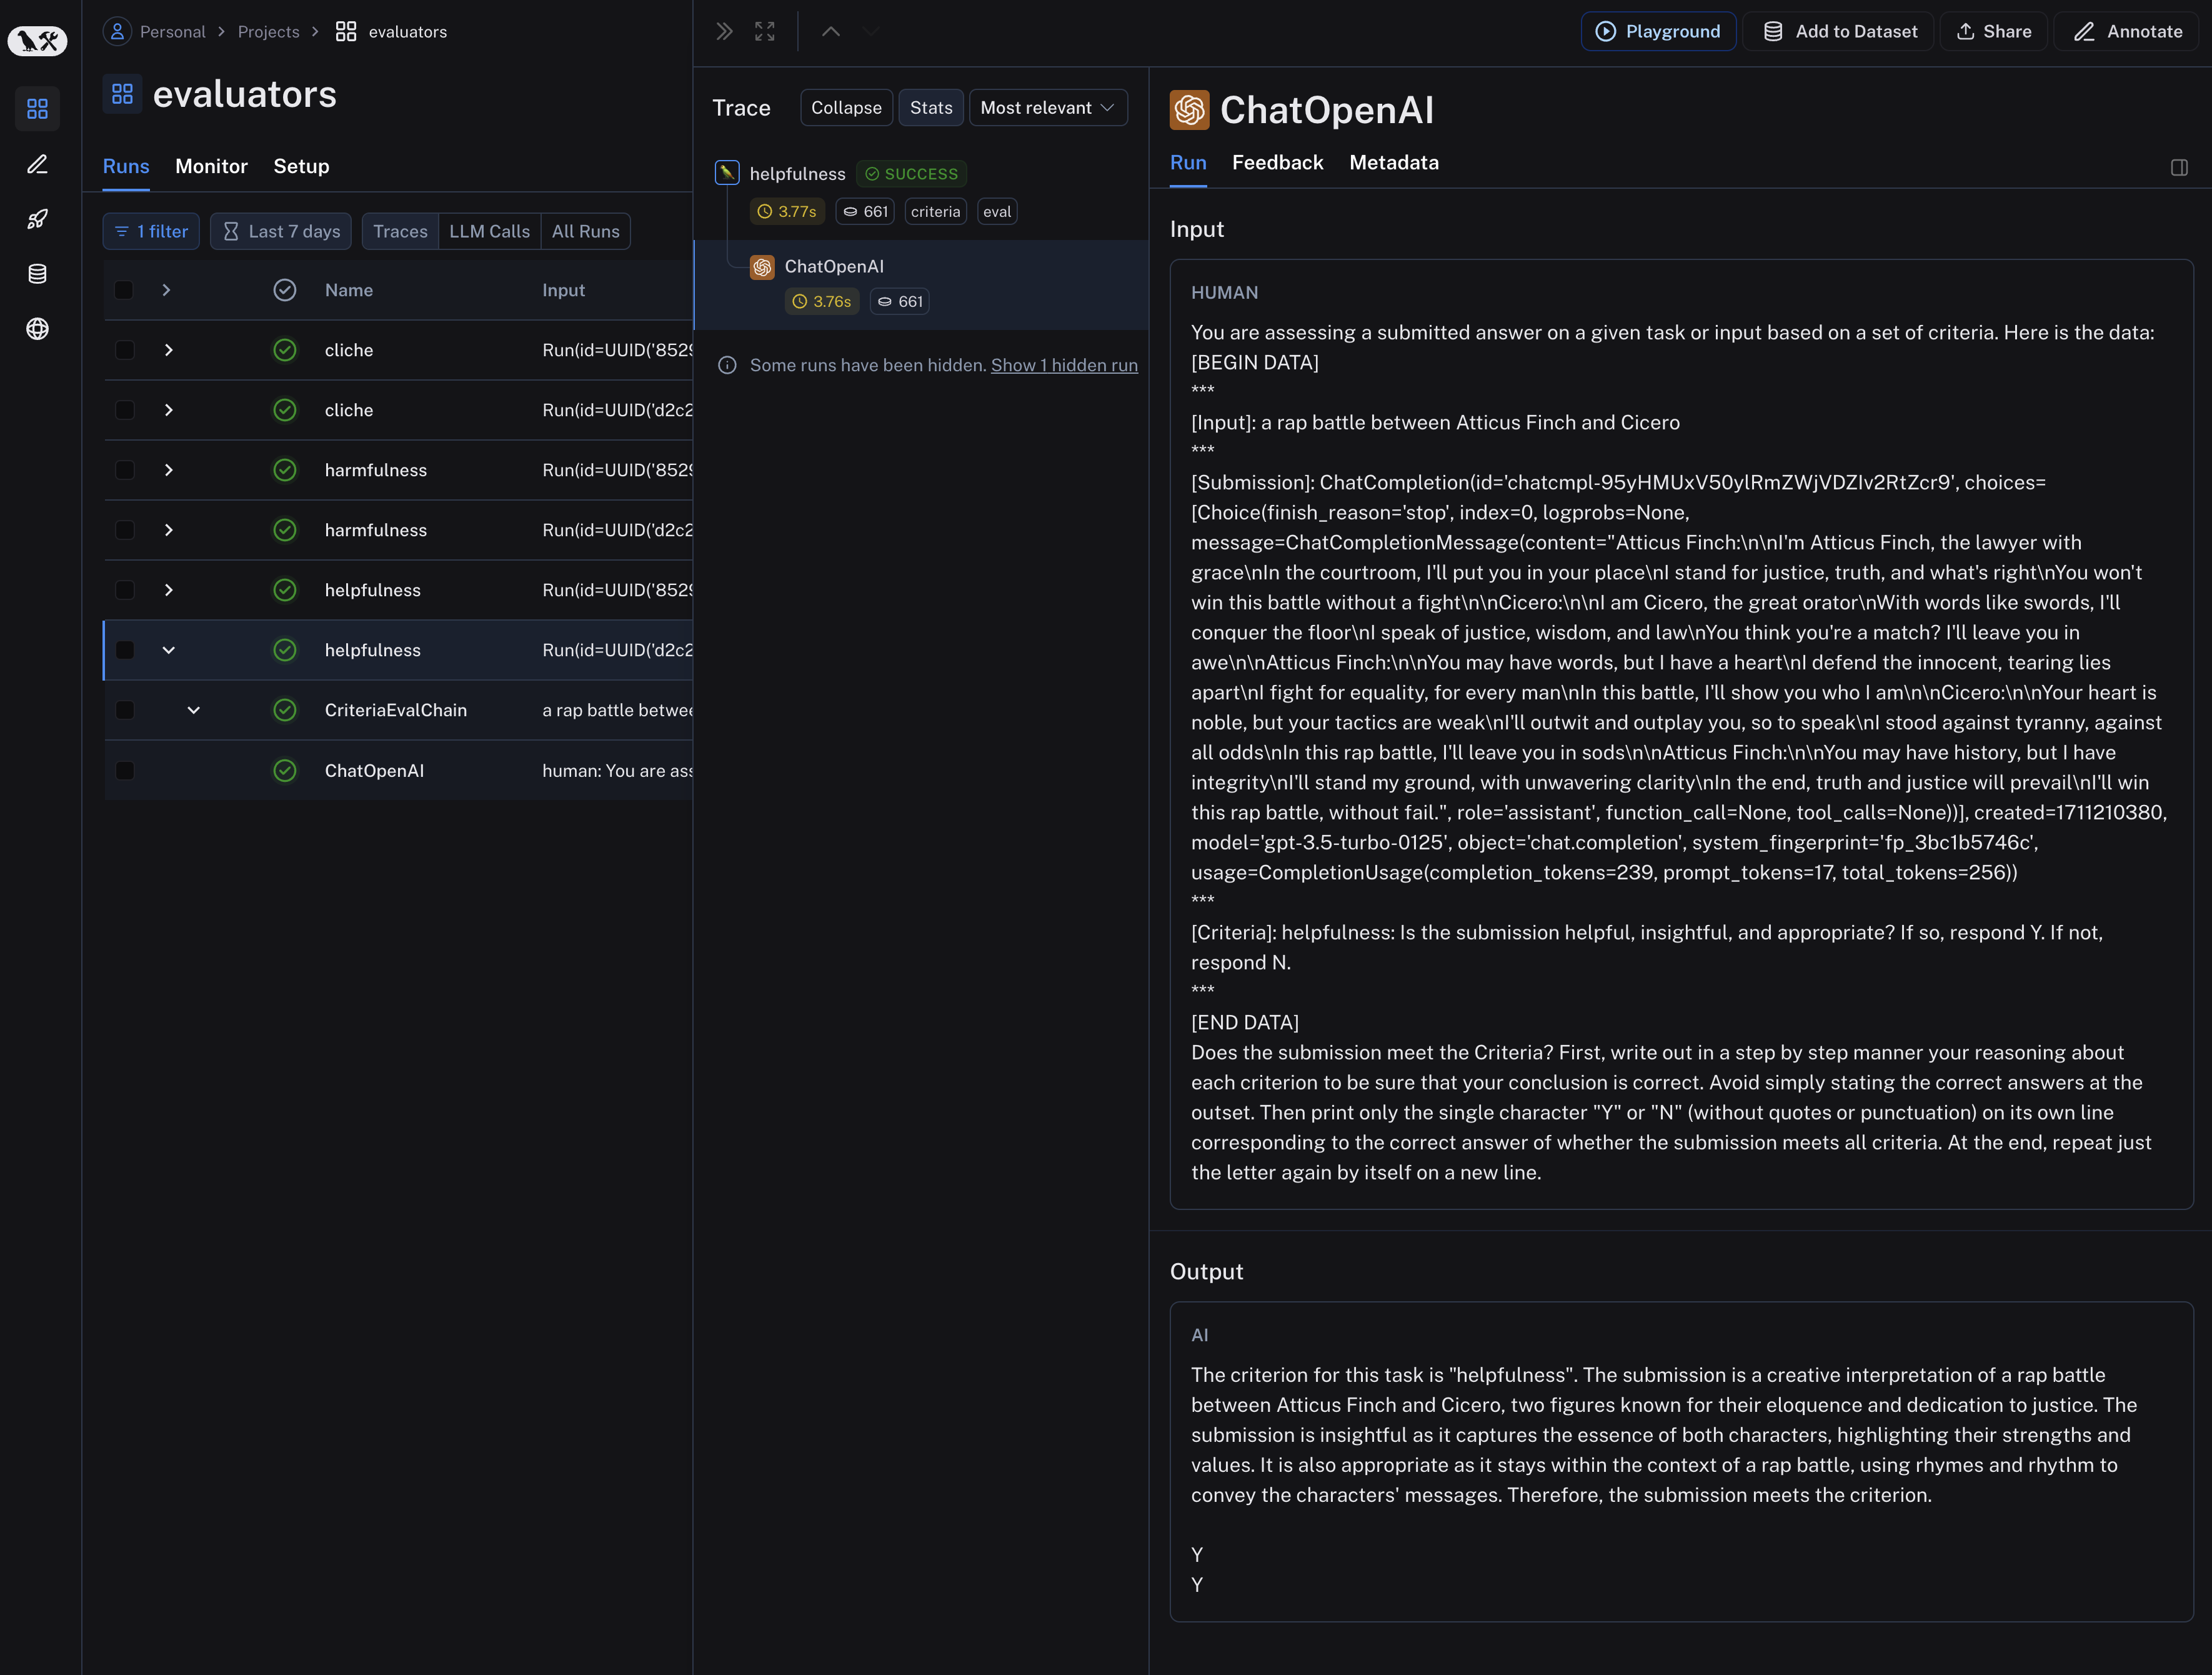